In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df['purpose'].nunique()

7

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Text(0.5, 1, 'Missing Data')

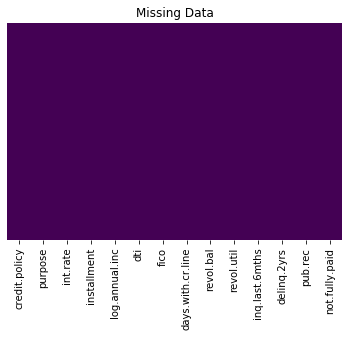

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title('Missing Data')

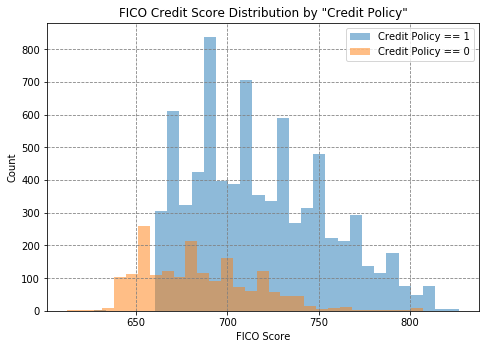

In [7]:
fig = plt.figure()

axes = fig.add_axes([0,0,1,1])
axes.hist(df[df['credit.policy'] == 1]['fico'],bins=30,alpha=0.5,label='Credit Policy == 1')
axes.hist(df[df['credit.policy'] == 0]['fico'],bins=30,alpha=0.5,label='Credit Policy == 0')
axes.set_xlabel('FICO Score')
axes.set_ylabel('Count')
axes.set_title('FICO Credit Score Distribution by "Credit Policy"')
plt.grid(color='grey',linestyle='--')
axes.legend()

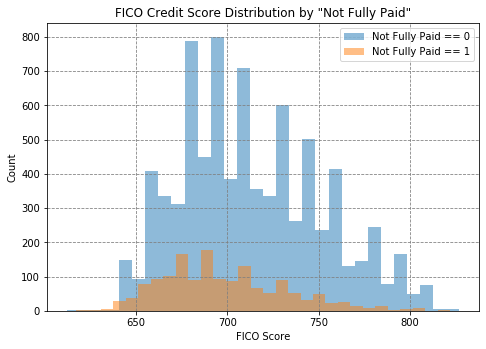

In [8]:
fig = plt.figure()

axes = fig.add_axes([0,0,1,1])
axes.hist(df[df['not.fully.paid'] == 0]['fico'],bins=30,alpha=0.5,label='Not Fully Paid == 0')
axes.hist(df[df['not.fully.paid'] == 1]['fico'],bins=30,alpha=0.5,label='Not Fully Paid == 1')
axes.set_xlabel('FICO Score')
axes.set_ylabel('Count')
axes.set_title('FICO Credit Score Distribution by "Not Fully Paid"')
plt.grid(color='grey',linestyle='--')
axes.legend()

Text(0.5, 1.0, 'Number of Loans by Type')

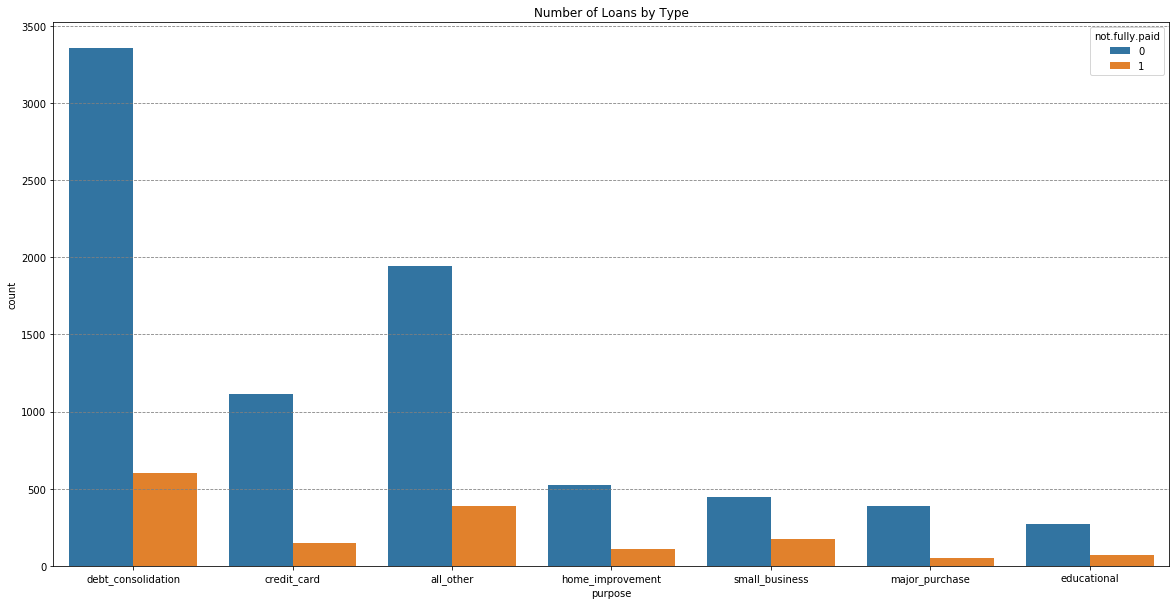

In [9]:
plt.figure(figsize=(20,10))
plt.grid(color='grey',linestyle='--')
sns.countplot(df['purpose'],hue=df['not.fully.paid']).set_title('Number of Loans by Type')

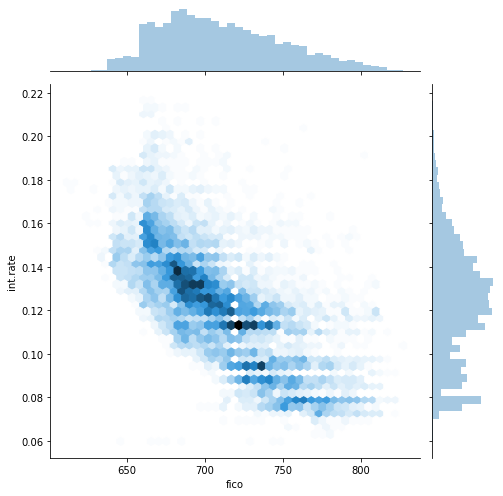

In [10]:
sns.jointplot(kind='hex',data=df,x='fico',y='int.rate',height=7)

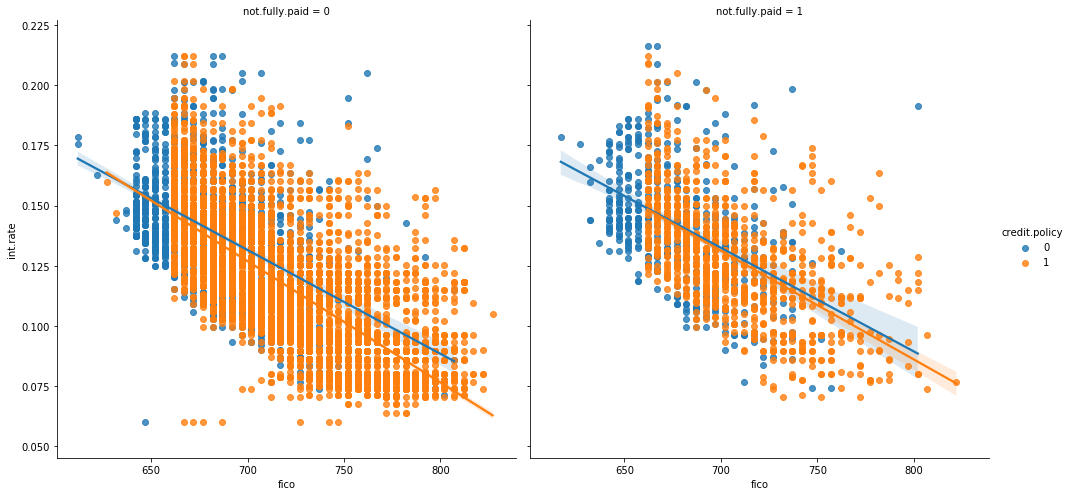

In [11]:
fig = sns.FacetGrid(df,col='not.fully.paid',hue='credit.policy',height=7)
fig.map(sns.regplot,'fico','int.rate')
fig.add_legend()

In [12]:
# Need to break up the 7 categories in the 'purpose' column into dummy variables

In [13]:
cat_feats = pd.get_dummies(df['purpose'],drop_first=True)

In [14]:
final_data = pd.concat([df,cat_feats],axis=1)
final_data.drop(['purpose'],axis=1,inplace=True)

In [15]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [16]:
# Split data for model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = final_data.drop(['not.fully.paid'],axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Create a Decision Tree Model for comparison against Random Forest Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2003  428]
 [ 343  100]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [22]:
# Create a Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2423    8]
 [ 433   10]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [ ]:
# This model rarely produces False Positives 
# but often produces False Negatives 

# This model often produces True Negativs
# but rarely produces True Positives

# The model does a good job predicting Actual False cases (when the person DOES NOT not.fully.pay)
# The model does a poor job predicting Actual True cases (when the person DOES not.fully.pay)

# This model rarely predicts a person will not pay and then they actually do pay. 
# However this model sometimes predicts that a person will pay and then they do not fully pay back the loan. 

# In Short: This model does a poor job of predicting when someone WILL NOT pay back a loan, but is otherwise pretty good. 